<a href="https://colab.research.google.com/github/vvrgit/Aquaculture/blob/main/Aquaculture_Data_Preprocessing_Fish_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/realfishdataset - Kaggle.csv")
data.head()

,ph,temperature,turbidity,fish
0,6.0,27.0,4.0,katla
1,7.6,28.0,5.9,sing
2,7.8,27.0,5.5,sing
3,6.5,31.0,5.5,katla
4,8.2,27.0,8.5,prawn


In [ ]:
stats=data.describe()
file_name = 'realtimefish.xlsx'
stats.to_excel(file_name)

<Axes: >

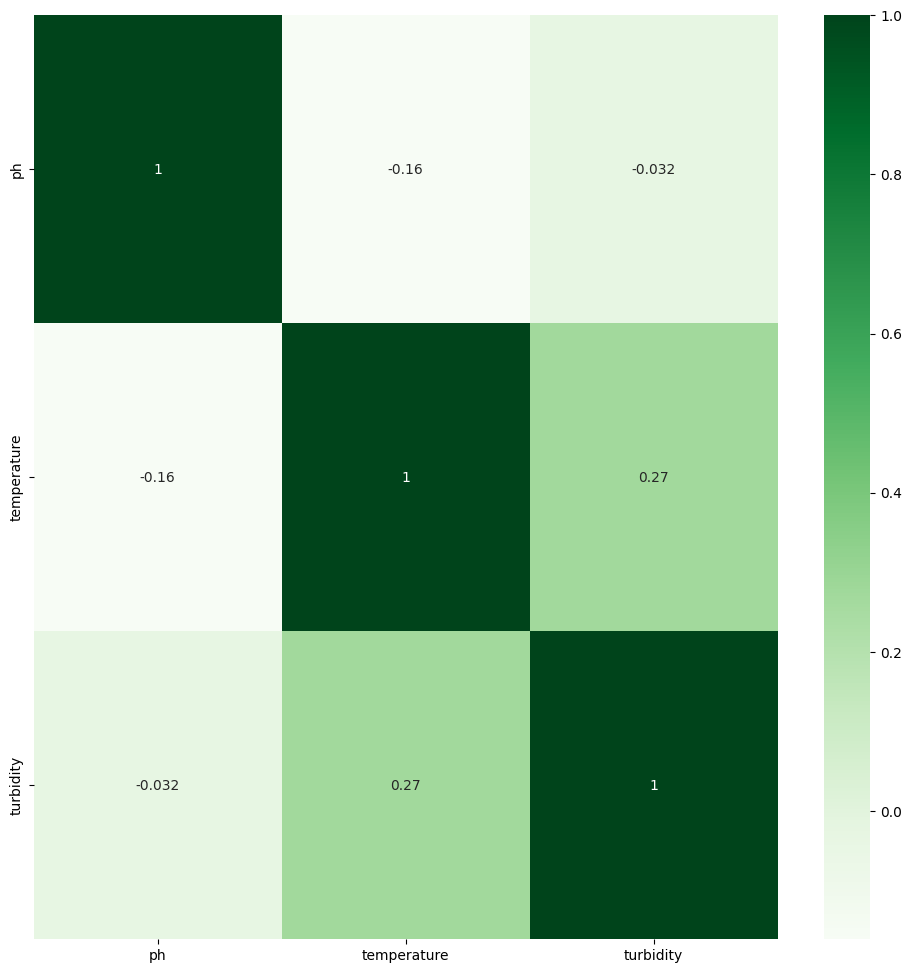

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
data1=data
data1.pop("fish")
matrix = data1.corr()

# plotting correlation matrix
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(matrix, cmap="Greens", annot=True)

In [ ]:
data=pd.read_csv("/content/realfishdataset - Kaggle.csv")
data.head()

,ph,temperature,turbidity,fish
0,6.0,27.0,4.0,katla
1,7.6,28.0,5.9,sing
2,7.8,27.0,5.5,sing
3,6.5,31.0,5.5,katla
4,8.2,27.0,8.5,prawn


In [ ]:
data.isnull().sum()

,0
ph,0
temperature,0
turbidity,0
fish,0


<Axes: >

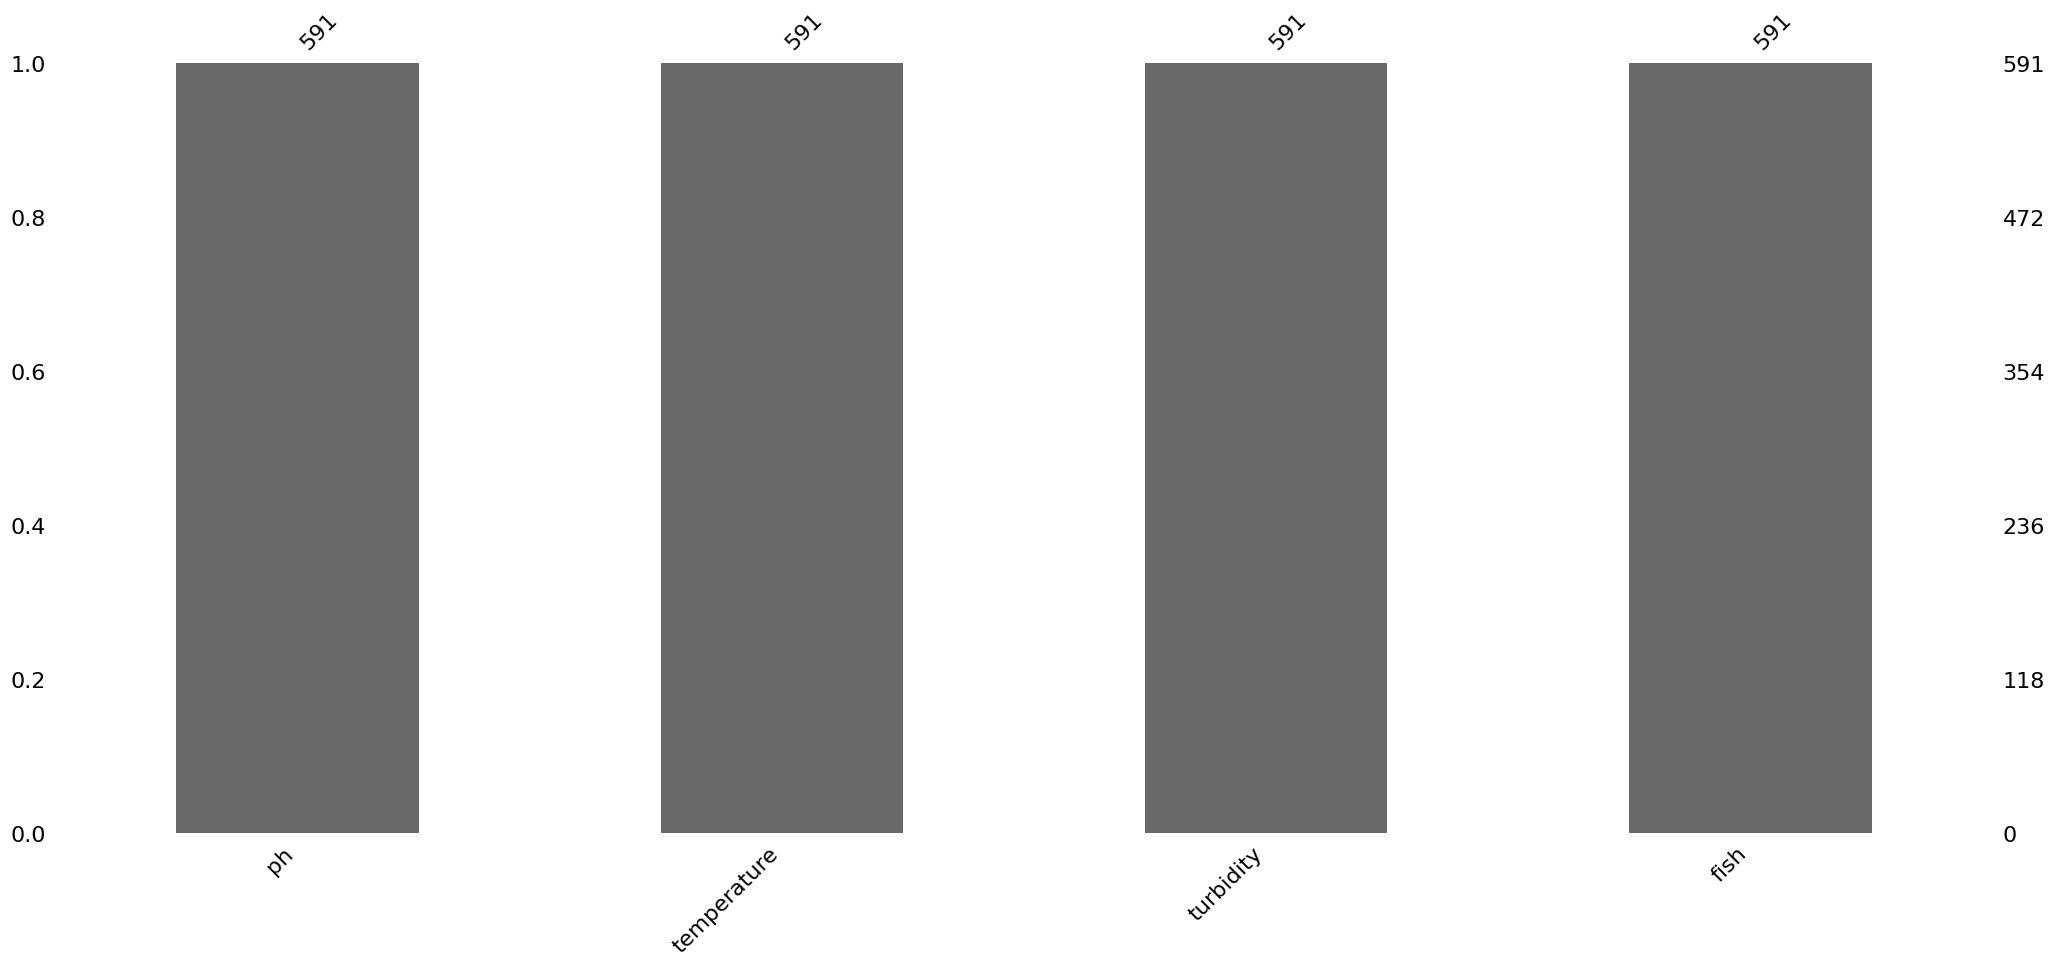

In [ ]:
# Program to visualize missing values in dataset
# Importing the libraries
import pandas as pd
import missingno as msno
msno.bar(data)

In [ ]:
data.describe()

,ph,temperature,turbidity
count,591.000000,591.000000,591.000000
mean,7.532115,21.789306,4.432944
std,0.810588,4.536612,2.169062
min,5.500000,4.000000,1.000000
25%,6.990000,17.940000,3.480000
50%,7.500000,21.060000,3.570000
75%,8.200000,24.000000,4.005000
max,9.000000,35.000000,15.800000


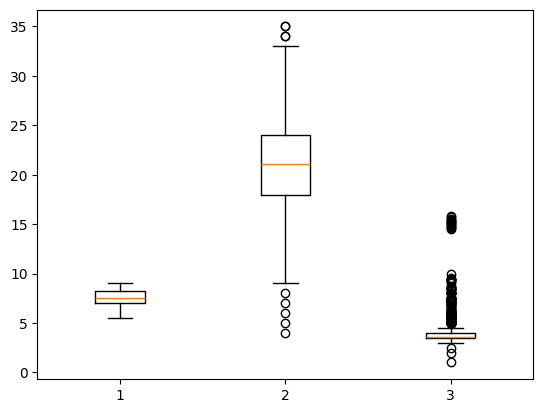

In [ ]:
# Creating plot
df=data[["ph","temperature","turbidity"]]
plt.boxplot(df)
# show plot
plt.show()

In [ ]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    #print(mean, std)
    for i in data:
        #print(i)
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
import numpy as np
sample_outliers_pH = detect_outliers_zscore(data1['ph'])
print("Outliers in pH column from Z-scores method: ", sample_outliers_pH)
sample_outliers_temp = detect_outliers_zscore(data1['temperature'])
print("Outliers in temperature column from Z-scores method: ", sample_outliers_temp)
sample_outliers_turb = detect_outliers_zscore(data1['turbidity'])
print("Outliers in turbidity column from Z-scores method: ", sample_outliers_turb)

Outliers in pH column from Z-scores method:  []
Outliers in temperature column from Z-scores method:  [5.0, 7.0, 8.0, 4.0, 6.0]
Outliers in turbidity column from Z-scores method:  [14.5, 14.6, 14.7, 14.8, 14.9, 15.1, 15.2, 15.0, 15.3, 15.4, 15.5, 15.7, 15.8, 15.19]


In [ ]:
from scipy.stats import zscore
zph1 = np.abs(zscore(data['ph']))
ztemp1 = np.abs(zscore(data['temperature']))
zturb1 = np.abs(zscore(data['turbidity']))
data.head()

,ph,temperature,turbidity,fish
0,6.0,27.0,4.0,katla
1,7.6,28.0,5.9,sing
2,7.8,27.0,5.5,sing
3,6.5,31.0,5.5,katla
4,8.2,27.0,8.5,prawn


In [ ]:
data['zph'] = zph1
data['ztemp'] = ztemp1
data['zturb'] = zturb1

In [ ]:
data.head()

,ph,temperature,turbidity,fish,zph,ztemp,zturb
0,6.0,27.0,4.0,katla,1.891730,1.149560,0.199769
1,7.6,28.0,5.9,sing,0.083819,1.370176,0.676928
2,7.8,27.0,5.5,sing,0.330762,1.149560,0.492360
3,6.5,31.0,5.5,katla,1.274371,2.032022,0.492360
4,8.2,27.0,8.5,prawn,0.824650,1.149560,1.876618


In [ ]:
data['zph']

,zph
0,1.891730
1,0.083819
2,0.330762
3,1.274371
4,0.824650
...,...
586,0.570582
587,0.669359
588,0.817525
589,1.052122


In [ ]:
outliers_ph=len(data[data['zph']>3])
outliers_temp=len(data[data['ztemp']>3])
outliers_turb=len(data[data['zturb']>3])

In [ ]:
print("outliers in ph",outliers_ph)
print("outliers in temp",outliers_temp)
print("outliers in turb",outliers_turb)

outliers in ph 0
outliers in temp 5
outliers in turb 0


In [ ]:
data_z = data[data['zph']<3]
data_z = data[data['ztemp']<3]
data_z = data[data['zturb']<3]
data_z

,ph,temperature,turbidity,fish,zph,ztemp,zturb
0,6.00,27.00,4.00,katla,1.891730,1.149560,0.199769
1,7.60,28.00,5.90,sing,0.083819,1.370176,0.676928
2,7.80,27.00,5.50,sing,0.330762,1.149560,0.492360
3,6.50,31.00,5.50,katla,1.274371,2.032022,0.492360
4,8.20,27.00,8.50,prawn,0.824650,1.149560,1.876618
...,...,...,...,...,...,...,...
586,7.07,21.12,3.57,sing,0.570582,0.147659,0.398179
587,6.99,21.19,3.56,sing,0.669359,0.132216,0.402793
588,6.87,21.00,3.56,sing,0.817525,0.174133,0.402793
589,6.68,21.19,3.58,sing,1.052122,0.132216,0.393565


In [ ]:
data=data_z.drop(['zph', 'ztemp', 'zturb'], axis=1)
data

,ph,temperature,turbidity,fish
0,6.00,27.00,4.00,katla
1,7.60,28.00,5.90,sing
2,7.80,27.00,5.50,sing
3,6.50,31.00,5.50,katla
4,8.20,27.00,8.50,prawn
...,...,...,...,...
586,7.07,21.12,3.57,sing
587,6.99,21.19,3.56,sing
588,6.87,21.00,3.56,sing
589,6.68,21.19,3.58,sing


In [ ]:
file_name = 'Aqua-Data.xlsx'
data.to_excel(file_name)

In [4]:
import pandas as pd

In [5]:
data=pd.read_excel("/content/drive/MyDrive/AQUACULTURE DATA/Realfish-Karpio-Katla-Shrimp-Silver.xlsx")
data.head()

,ph,temperature,turbidity,fish
0,7.0,5.0,5.0,0
1,7.1,10.0,6.0,0
2,7.2,15.0,7.0,0
3,7.3,20.0,8.0,0
4,7.5,25.0,9.0,0


In [6]:
# class count
fish_samples = data['fish'].value_counts()

# Separate class
class_0 = data[data['fish'] == 0]
class_1 = data[data['fish'] == 1]# print the shape of the class
class_2 = data[data['fish'] == 2]
class_3 = data[data['fish'] == 3]# print the shape of the class
class_4 = data[data['fish'] == 4]
#class_5 = data[data['fish'] == 5]# print the shape of the class
#class_6 = data[data['fish'] == 6]
#class_7 = data[data['fish'] == 7]# print the shape of the class
#class_8 = data[data['fish'] == 8]# print the shape of the class
#class_9 = data[data['fish'] == 9]
#class_10 = data[data['fish'] == 10]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
#print('class 5:', class_5.shape)
#print('class 6:', class_6.shape)
#print('class 7:', class_7.shape)
#print('class 8:', class_8.shape)
#print('class 9:', class_9.shape)
#print('class 10:', class_10.shape)

class 0: (33, 4)
class 1: (58, 4)
class 2: (50, 4)
class 3: (55, 4)
class 4: (0, 4)


In [ ]:
fish_samples

,count
fish,
1,58
3,55
2,50
4,49
0,33


<Axes: title={'center': 'count (target)'}, xlabel='fish'>

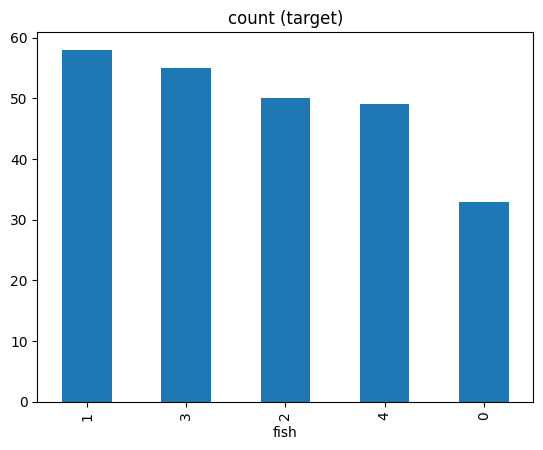

In [ ]:
data['fish'].value_counts().plot(kind='bar', title='count (target)')

<Axes: title={'center': 'count (target)'}, xlabel='fish'>

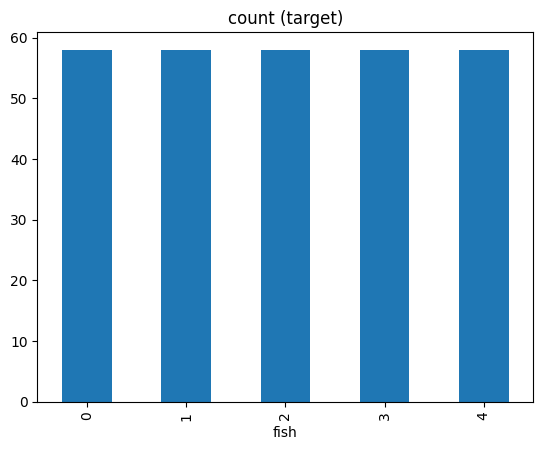

In [ ]:
class_0_over = class_0.sample(58, replace=True)
class_1_over = class_1.sample(58, replace=True)
class_2_over = class_2.sample(58, replace=True)
class_3_over = class_3.sample(58, replace=True)
class_4_over = class_4.sample(58, replace=True)
#class_5_over = class_5.sample(129, replace=True)
#class_6_over = class_6.sample(129, replace=True)
#class_7_over = class_7.sample(129, replace=True)
#class_8_over = class_8.sample(129, replace=True)
#class_9_over = class_9.sample(129, replace=True)


test_over = pd.concat([class_0_over,class_1_over,class_2_over,class_3_over,class_4_over], axis=0)

#print("total class of 1 and 0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_over['fish'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
test_over

,ph,temperature,turbidity,fish
20,7.20,17.00,9.30,0
21,7.30,18.00,5.40,0
23,7.40,25.00,7.40,0
4,7.50,25.00,9.00,0
27,7.30,6.00,9.30,0
...,...,...,...,...
202,8.10,29.00,7.20,4
240,7.07,21.12,3.57,4
239,7.50,21.06,3.57,4
231,7.50,21.06,3.57,4


In [ ]:
file_name = 'Aqua-Data-Over-Sample.xlsx'
test_over.to_excel(file_name)

In [15]:
data=pd.read_excel("/content/drive/MyDrive/AQUACULTURE DATA/Realfish-Karpio-Katla-Shrimp-Silver.xlsx")
data.head()

,ph,temperature,turbidity,fish
0,7.0,5.0,5.0,0
1,7.1,10.0,6.0,0
2,7.2,15.0,7.0,0
3,7.3,20.0,8.0,0
4,7.5,25.0,9.0,0


In [16]:
stats=data.describe()
file_name = 'realtimefish.xlsx'
stats.to_excel(file_name)

<Axes: >

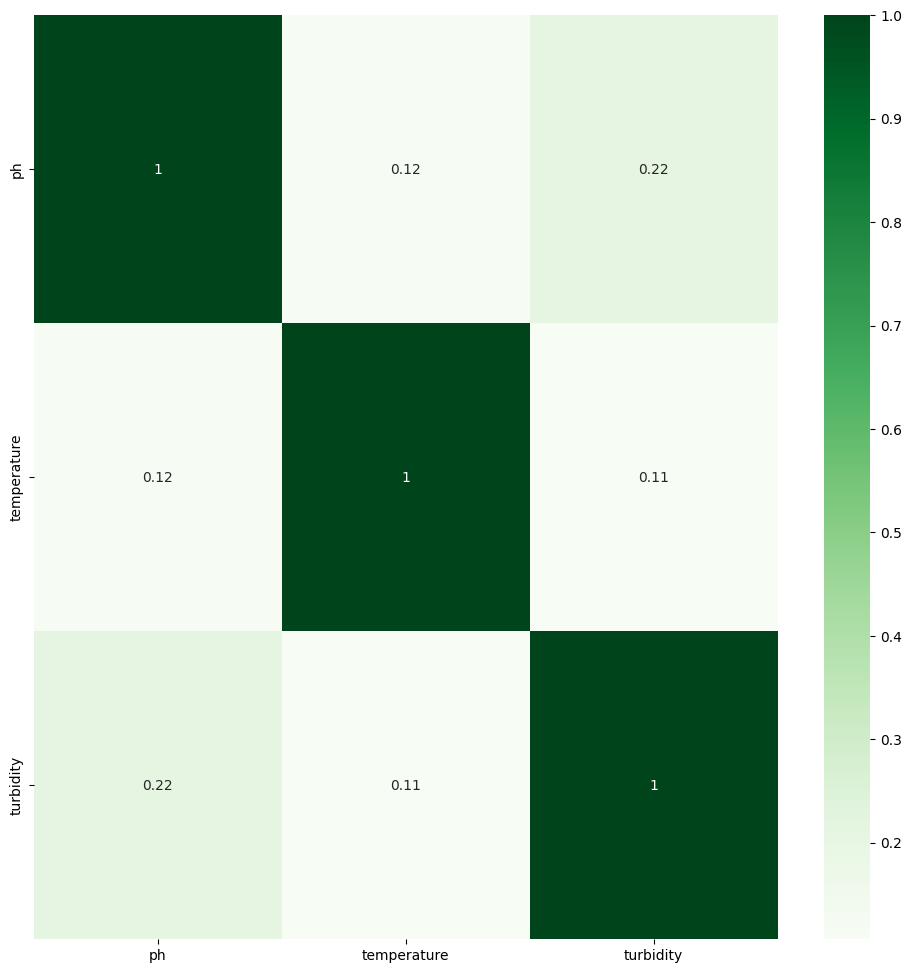

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
data1=data
data1.pop("fish")
matrix = data1.corr()

# plotting correlation matrix
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(matrix, cmap="Greens", annot=True)

<Axes: >

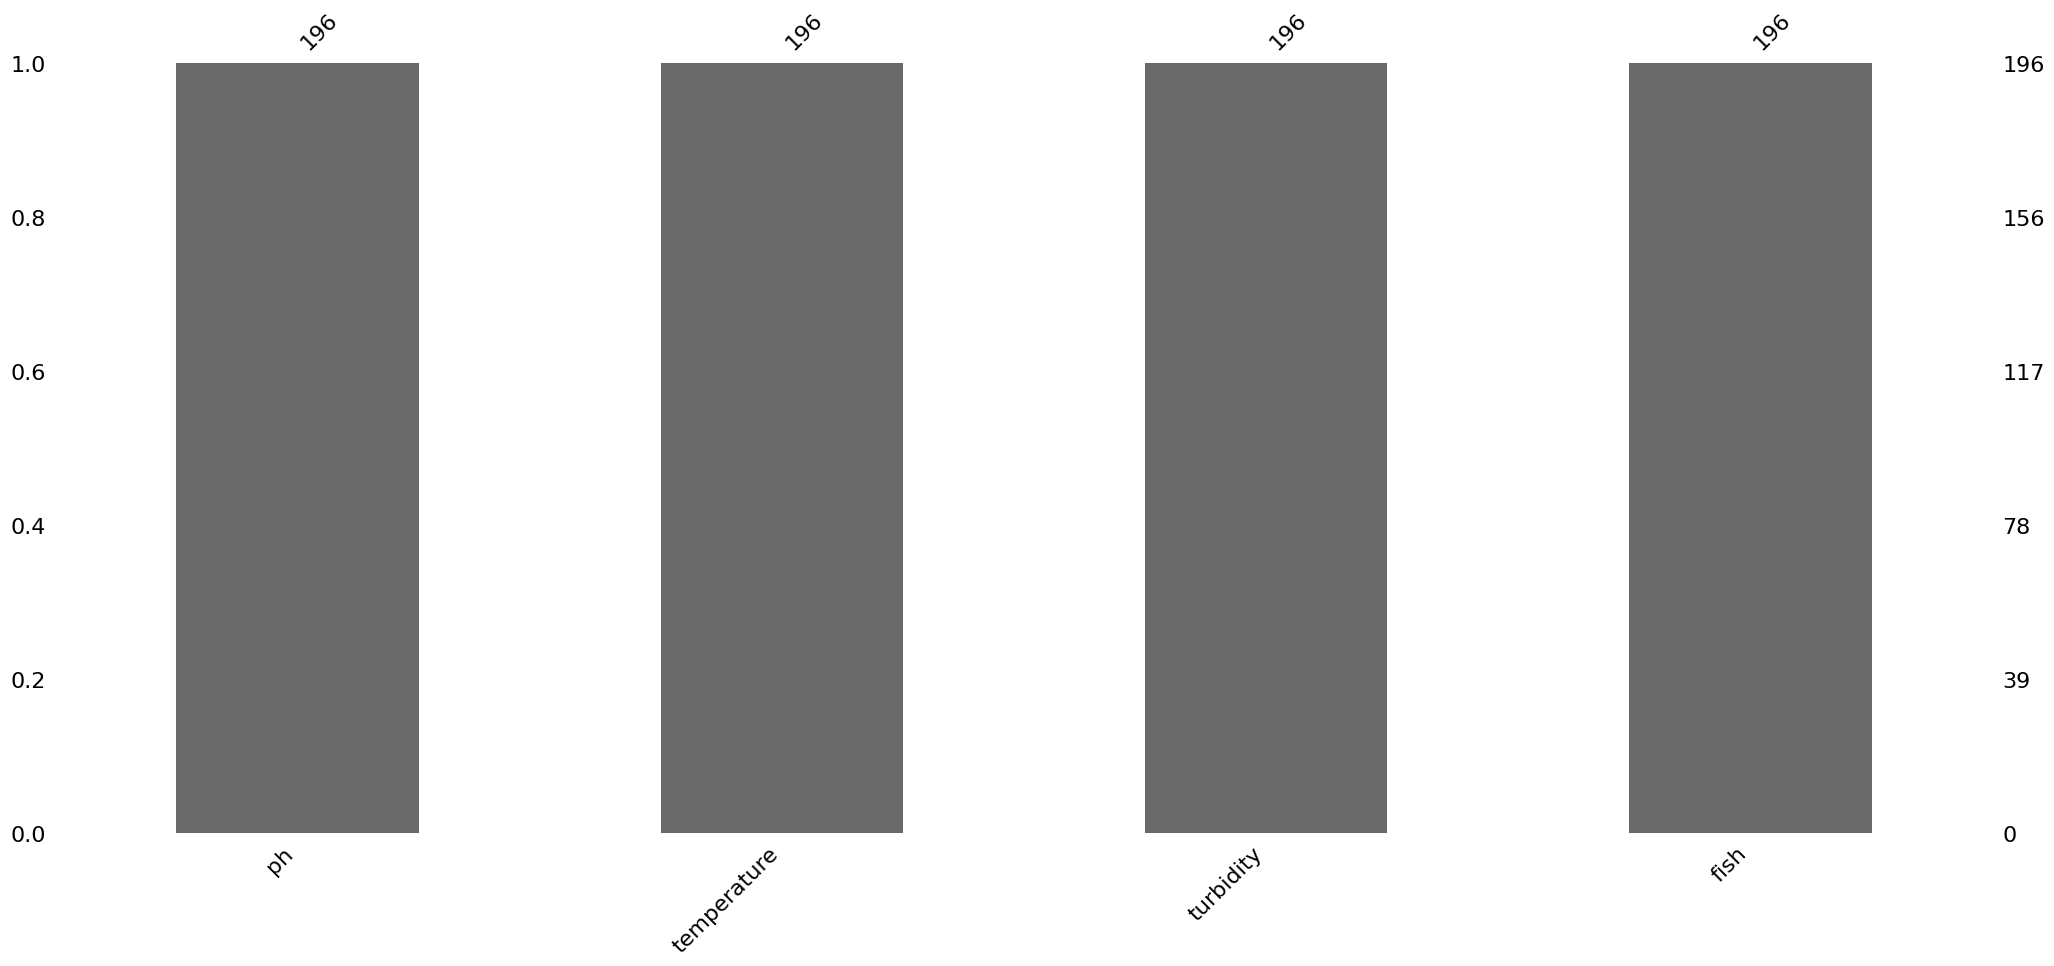

In [17]:
# Program to visualize missing values in dataset
# Importing the libraries
import pandas as pd
import missingno as msno
msno.bar(data)

In [18]:
data.describe()

,ph,temperature,turbidity,fish
count,196.000000,196.000000,196.000000,196.000000
mean,7.244388,21.970612,5.230408,1.647959
std,0.615853,4.758569,3.210306,1.063881
min,6.000000,4.000000,3.560000,0.000000
25%,6.920000,21.120000,3.600000,1.000000
50%,7.260000,21.250000,3.610000,2.000000
75%,7.600000,21.500000,5.500000,3.000000
max,8.800000,35.000000,15.800000,3.000000


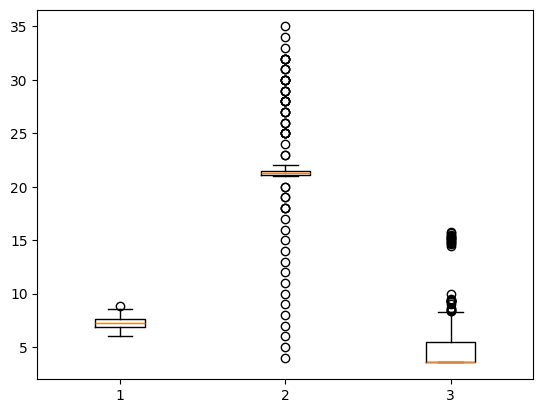

In [19]:
# Creating plot
df=data[["ph","temperature","turbidity"]]
plt.boxplot(df)
# show plot
plt.show()

In [20]:
import numpy as np
from scipy.stats import zscore
zph1 = np.abs(zscore(data['ph']))
ztemp1 = np.abs(zscore(data['temperature']))
zturb1 = np.abs(zscore(data['turbidity']))
data.head()

,ph,temperature,turbidity,fish
0,7.0,5.0,5.0,0
1,7.1,10.0,6.0,0
2,7.2,15.0,7.0,0
3,7.3,20.0,8.0,0
4,7.5,25.0,9.0,0


In [21]:
data['zph'] = zph1
data['ztemp'] = ztemp1
data['zturb'] = zturb1

In [22]:
data.head()

,ph,temperature,turbidity,fish,zph,ztemp,zturb
0,7.0,5.0,5.0,0,0.397844,3.575460,0.071955
1,7.1,10.0,6.0,0,0.235052,2.522033,0.240339
2,7.2,15.0,7.0,0,0.072260,1.468606,0.552634
3,7.3,20.0,8.0,0,0.090532,0.415179,0.864928
4,7.5,25.0,9.0,0,0.416117,0.638248,1.177223


In [23]:
outliers_ph=len(data[data['zph']>3])
outliers_temp=len(data[data['ztemp']>3])
outliers_turb=len(data[data['zturb']>3])

In [24]:
print("outliers in ph",outliers_ph)
print("outliers in temp",outliers_temp)
print("outliers in turb",outliers_turb)

outliers in ph 0
outliers in temp 4
outliers in turb 10


In [25]:
data_z = data[data['zph']<3]
data_z = data[data['ztemp']<3]
data_z = data[data['zturb']<3]
data_z

,ph,temperature,turbidity,fish,zph,ztemp,zturb
0,7.00,5.00,5.00,0,0.397844,3.575460,0.071955
1,7.10,10.00,6.00,0,0.235052,2.522033,0.240339
2,7.20,15.00,7.00,0,0.072260,1.468606,0.552634
3,7.30,20.00,8.00,0,0.090532,0.415179,0.864928
4,7.50,25.00,9.00,0,0.416117,0.638248,1.177223
...,...,...,...,...,...,...,...
191,7.00,21.12,3.57,3,0.397844,0.179212,0.518536
192,7.27,21.19,3.57,3,0.041695,0.164464,0.518536
193,7.24,21.06,3.56,3,0.007143,0.191853,0.521659
194,7.11,21.25,3.56,3,0.218773,0.151822,0.521659


In [26]:
data=data_z.drop(['zph', 'ztemp', 'zturb'], axis=1)
data

,ph,temperature,turbidity,fish
0,7.00,5.00,5.00,0
1,7.10,10.00,6.00,0
2,7.20,15.00,7.00,0
3,7.30,20.00,8.00,0
4,7.50,25.00,9.00,0
...,...,...,...,...
191,7.00,21.12,3.57,3
192,7.27,21.19,3.57,3
193,7.24,21.06,3.56,3
194,7.11,21.25,3.56,3


In [27]:
file_name = 'Aqua-Fish-Spec-Dataset-Post-Outlier.xlsx'
data.to_excel(file_name)